# Personal Exploratory Data Analysis Project

**Author:** Karli Dean
**Due Date:** October 3, 2025

### A Brief Introduction and Purpose Statement

Hello, my name is Karli Dean. I am a former collegiate athlete at the NCAA Division II level, where I played at the University of Missouri - St. Louis (UMSL). During my tenure, I was a two - time Great Lakes Valley Conference Tournament Finalist, a Great Lakes Valley Conference Sportsmanship Award Honoree, and a two - time NCAA Division II National Semifinalist. I've played volleyball for about 15 years of my life, 18 if you count the times I was in the gym with my mom when she was coaching. I'm 23 now, so that is well over half of my life. Within these 18 years, I have held coaching roles at the club level while playing on my university's team, I have been a multisport athlete, and I have learned to grow my mind and see the game in a new, data - driven, mindset. I believe that while this game is extremely fun and is the ultimate team sport, it is an extremely technical subject. Most statistics that are recorded work in tandem with each other, like they're on a team of their own. In this Exploratory Data Analysis (EDA), we will get the chance to explore these tendencies with each other.

### An Introduction to the Data
There are two data sets that are used within this EDA. The first is a compilation of multiple tables within 1 CSV from the [NCAA Volleyball Site](https://web1.ncaa.org/stats/StatsSrv/rankings?doWhat=archive&sportCode=WVB). I merged most of this together manually in Excel to get us to our master data file `ncaavb_d2stats.csv`. The second data set is a filtered down version of the first, only including the records of schools in the Great Lakes Valley Conference. This data set is called `glvc_stats.csv`. I have added the columns `school_id` and `conference_id` to each dataset. You can find both of these sets in the `data` folder of this repo.

### Imports from Python and External Libraries

The first step in any good EDA is to have your imports in check. We do this by importing our packages in the first Python cell possible. As this analysis is completed with Jupyter Notebooks, we are able to run all of our cells in order like one big script. Putting these packages and imports first allows every other cell to reference this one for functions and necessary tools.

In [1]:
# Importing packages from the Python Libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Loading the Data from the CSV

Our next step is to load our data into a usable DataFrame (df). We load this in using a function in pandas called `pd.read_csv()` that views the CSV data we've collected, but doesn't allow any of our changes to affect the original data. It comes in handy if we make mistakes with what we want to add or delete later. The following code imports `ncaavb_d2stats.csv` from the `data` folder using pandas.

In [2]:
# Importing the CSV file into a DataFrame using Pandas
volleyball_df = pd.read_csv('data/ncaavb_d2stats.csv')

### Data Inspection

To get a view of the table we're working with in this CSV, we can use the `.head()` function. I specified the function to allow us to see the first 10 rows of the DataFrame.

In [3]:
# Gettign a look at the DataFrame using the head function.
volleyball_df.head(10)

,school_id,school_name,school_conference,conference_id,sets_played,match_win,match_loss,ttl_ace,ace_set,ttl_assist,...,ttl_atterror,ttl_attack,attack_percentage,attack_set,attkill_set,win_percentage,ttl_oppkill,ttl_oppatterror,ttl_oppattack,oppattack_percentage
0,t001,Academy of Art,PacWest,Q,101,6,22,153,1.51,1060,...,649,3657,0.137,36.21,11.40,0.214286,1286,527,3544,0.214
1,t002,Adams St.,RMAC,T,101,11,16,97,0.96,1192,...,605,3833,0.176,37.95,12.66,0.407407,1213,597,3730,0.165
2,t003,Adelphi,NE10,O,119,23,10,241,2.03,1468,...,621,4018,0.241,33.76,13.35,0.696970,1218,597,3890,0.160
3,t004,Alas. Anchorage,GNAC,I,101,16,12,194,1.92,1120,...,478,3612,0.204,35.76,12.02,0.571429,1219,553,3638,0.183
4,t005,Alas. Fairbanks,GNAC,I,110,21,7,199,1.81,1364,...,536,3921,0.234,35.65,13.20,0.750000,1302,574,3894,0.187
5,t006,Albany St. (GA),SIAC,U,109,19,10,182,1.67,1212,...,649,3864,0.177,35.45,12.23,0.655172,1194,662,3782,0.141
6,t007,Allen,SIAC,U,98,7,19,134,1.37,910,...,536,3415,0.136,34.85,10.20,0.269231,1223,562,3518,0.188
7,t008,American Int'l,NE10,O,100,21,7,218,2.18,1180,...,473,3593,0.220,35.93,12.65,0.750000,1065,549,3555,0.145
8,t009,Anderson (SC),South Atlantic,V,119,19,11,186,1.56,1475,...,702,4305,0.202,36.18,13.19,0.633333,1277,624,4076,0.160
9,t010,Angelo St.,Lone Star,L,125,32,3,187,1.50,1705,...,630,4838,0.244,38.70,14.48,0.914286,1519,685,4724,0.177


**Finding 1:** Using the `.head()` function, we are able to see how many columns and rows we have in this df. Using the scroll bar, look at how many stats can be tracked in this game!

We can also look at the data using the `.shape()` and `.info()` functions. The shape function is going to tell us how big the df is (rows, columns) and the info function will tell us those columns' names, how many there are, what their data type is, and how much data this df takes up in the Notebook.

In [4]:
# Gaining other details on this df from the shape, dtypes, and describe functions.
print(volleyball_df.shape)
print(volleyball_df.info())

(279, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_id             279 non-null    object 
 1   school_name           279 non-null    object 
 2   school_conference     279 non-null    object 
 3   conference_id         279 non-null    object 
 4   sets_played           279 non-null    int64  
 5   match_win             279 non-null    int64  
 6   match_loss            279 non-null    int64  
 7   ttl_ace               279 non-null    int64  
 8   ace_set               279 non-null    float64
 9   ttl_assist            279 non-null    int64  
 10  assist_set            279 non-null    float64
 11  ttl_soloblock         279 non-null    int64  
 12  ttl_blockassist       279 non-null    int64  
 13  block_set             279 non-null    float64
 14  ttl_dig               279 non-null    int64  
 15  dig_set      

**Finding 2:** Take a look at how many columns there are in this df. We have to select a scrollable element to be able to see everything. It is the same df as before, we are just seeing a new angle of it.

### Descriptive Statistics

In [5]:
# Acquiring a statistical overview with describe function
volleyball_df.describe()

,sets_played,match_win,match_loss,ttl_ace,ace_set,ttl_assist,assist_set,ttl_soloblock,ttl_blockassist,block_set,...,ttl_atterror,ttl_attack,attack_percentage,attack_set,attkill_set,win_percentage,ttl_oppkill,ttl_oppatterror,ttl_oppattack,oppattack_percentage
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,103.853047,14.204301,13.949821,173.261649,1.659785,1154.100358,11.027348,56.200717,274.551971,1.846810,...,551.089606,3705.358423,0.184287,35.628136,11.929749,0.492504,1244.885305,553.770609,3705.193548,0.188341
std,12.158571,7.188459,5.645173,42.959991,0.327038,236.989050,1.404808,19.760687,91.656753,0.399834,...,74.195027,529.913697,0.049907,2.422851,1.481097,0.218656,154.124241,90.667852,529.395887,0.032200
min,62.000000,0.000000,1.000000,60.000000,0.730000,396.000000,5.820000,16.000000,45.000000,0.760000,...,309.000000,1848.000000,-0.007000,27.180000,6.130000,0.000000,716.000000,274.000000,1927.000000,0.101000
25%,97.000000,9.000000,10.000000,145.500000,1.445000,998.000000,10.205000,42.500000,211.000000,1.565000,...,503.000000,3413.000000,0.154000,34.210000,11.150000,0.333333,1158.000000,490.000000,3383.000000,0.168000
50%,104.000000,14.000000,14.000000,170.000000,1.640000,1173.000000,11.240000,53.000000,270.000000,1.860000,...,551.000000,3696.000000,0.187000,35.520000,12.150000,0.500000,1260.000000,554.000000,3704.000000,0.187000
75%,112.000000,19.000000,18.000000,198.500000,1.865000,1306.000000,11.920000,69.000000,332.500000,2.105000,...,600.500000,4037.500000,0.219500,37.240000,12.915000,0.655172,1340.000000,610.000000,4040.000000,0.210500
max,137.000000,34.000000,28.000000,334.000000,2.780000,1768.000000,13.930000,124.000000,529.000000,2.910000,...,754.000000,5156.000000,0.300000,42.150000,15.010000,0.971429,1736.000000,828.000000,5371.000000,0.292000


### Data Distribution for Numerical Columns

<Axes: >

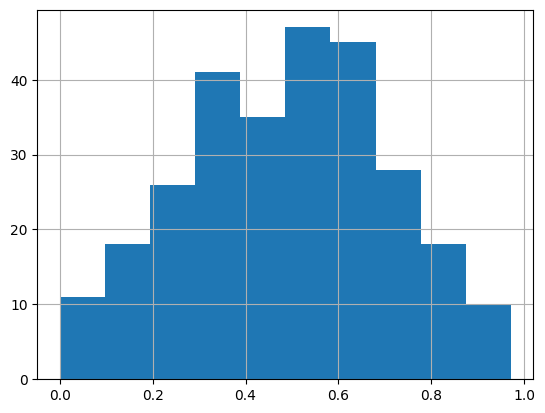

In [6]:
# Inspecting histograms for all numerical columns
volleyball_df['win_percentage'].hist()

### Data Distribution for Categorical Columns

In [7]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
volleyball_df['school_conference'].value_counts()

# Inspect value counts for ALL categorical columns
for col in volleyball_df.select_dtypes(include=['object']).columns:
    print(f"Value Counts for '{col}':")
    print(volleyball_df[col].value_counts())

Value Counts for 'school_id':
school_id
t001    1
t002    1
t003    1
t004    1
t005    1
       ..
t275    1
t276    1
t277    1
t278    1
t279    1
Name: count, Length: 279, dtype: int64
Value Counts for 'school_name':
school_name
Academy of Art     1
Adams St.          1
Adelphi            1
Alas. Anchorage    1
Alas. Fairbanks    1
                  ..
Wingate            1
Winona St.         1
Winston-Salem      1
Wis.-Parkside      1
Young Harris       1
Name: count, Length: 279, dtype: int64
Value Counts for 'school_conference':
school_conference
Lone Star               19
PSAC                    16
RMAC                    15
NSIC                    15
GLVC                    14
Conference Carolinas    14
SIAC                    14
G-MAC                   13
South Atlantic          13
CACC                    12
CCAA                    12
CIAA                    12
Great American          12
PacWest                 11
NE10                    11
Sunshine State          11
MIAA     

In [8]:
# Inspect value counts for ALL categorical columns
# for col in volleyball_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    # sns.countplot(x=col, data=volleyball_df)
    # plt.title(f'Distribution of {col}')
    # plt.show()

The only one that's worth looking at is the conference count plot. Everything else is row - specific.

### Data Transformation and Feature Engineering

In [9]:
# Feature Engineering
# Renaming Columns
volleyball_df.rename(columns={'school_id': 'School ID'}, inplace=True)
volleyball_df.rename(columns={'school_name': 'School Name'}, inplace=True)
volleyball_df.rename(columns={'school_conference': 'Conference'}, inplace=True)
volleyball_df.rename(columns={'conference_id': 'Conference ID'}, inplace=True)
volleyball_df.rename(columns={'sets_played': 'total Sets'}, inplace=True)
volleyball_df.rename(columns={'match_win': 'Wins'}, inplace=True)
volleyball_df.rename(columns={'match_loss': 'Losses'}, inplace=True)
volleyball_df.rename(columns={'ttl_ace': 'Total Aces'}, inplace=True)
volleyball_df.rename(columns={'ace_set': 'Aces Per Set'}, inplace=True)
volleyball_df.rename(columns={'ttl_assist': 'Total Assists'}, inplace=True)
volleyball_df.rename(columns={'assist_set': 'Assists Per Set'}, inplace=True)
volleyball_df.rename(columns={'ttl_soloblock': 'Total Solo Blocks'}, inplace=True)
volleyball_df.rename(columns={'ttl_blockassist': 'Total Block Assists'}, inplace=True)
volleyball_df.rename(columns={'block_set': 'Blocks Per Set'}, inplace=True)
volleyball_df.rename(columns={'ttl_dig': 'Total Digs'}, inplace=True)
volleyball_df.rename(columns={'dig_set': 'Digs Per Set'}, inplace=True)
volleyball_df.rename(columns={'ttl_attkill': 'Total Kills'}, inplace=True)
volleyball_df.rename(columns={'ttl_atterror': 'Total Attacking Errors'}, inplace=True)
volleyball_df.rename(columns={'ttl_attack': 'Total Attacks'}, inplace=True)
volleyball_df.rename(columns={'attack_percentage': 'Hitting Percentage'}, inplace=True)
volleyball_df.rename(columns={'attack_set': 'Total Attacks Per Set'}, inplace=True)
volleyball_df.rename(columns={'attkill_set': 'Kills Per Set'}, inplace=True)
volleyball_df.rename(columns={'win_percentage': 'Winning Percentage'}, inplace=True)
volleyball_df.rename(columns={'ttl_oppkill': 'Total Kills by Opponent'}, inplace=True)
volleyball_df.rename(columns={'ttl_oppatterror': 'Total Hitting Errors by Opponent'}, inplace=True)
volleyball_df.rename(columns={'ttl_oppattack': 'Total Attacks by Opponent'}, inplace=True)
volleyball_df.rename(columns={'oppattack_percentage': 'Opponent Hitting Percentage'}, inplace=True)

In [10]:
# Feature Engineering
# Adding a New Column
volleyball_df['Total Blocks'] = (volleyball_df['Total Solo Blocks'] + volleyball_df['Total Block Assists'])

In [11]:
# Making sure everything is correct
volleyball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   School ID                         279 non-null    object 
 1   School Name                       279 non-null    object 
 2   Conference                        279 non-null    object 
 3   Conference ID                     279 non-null    object 
 4   total Sets                        279 non-null    int64  
 5   Wins                              279 non-null    int64  
 6   Losses                            279 non-null    int64  
 7   Total Aces                        279 non-null    int64  
 8   Aces Per Set                      279 non-null    float64
 9   Total Assists                     279 non-null    int64  
 10  Assists Per Set                   279 non-null    float64
 11  Total Solo Blocks                 279 non-null    int64  
 12  Total Bl

### Visualizations

In [12]:
# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
# sns.pairplot(volleyball_df, hue='Conference')

# Showing all plots
# plt.show()

### More Feature Engineering - Dropping Unnecessary Fields

In [13]:
# Feature Engineering
# Dropping Columns
volleyball_df.drop(columns=[
    'School ID', 
    'Wins',
    'Losses',
    'total Sets', 
    'Total Aces', 
    'Total Assists', 
    'Total Solo Blocks', 
    'Total Block Assists', 
    'Total Digs', 
    'Total Kills', 
    'Total Attacking Errors', 
    'Total Attacks', 
    'Total Kills by Opponent', 
    'Total Hitting Errors by Opponent', 
    'Total Attacks by Opponent',
    'Total Blocks'
    ], 
    inplace=True
    )


In [14]:
# checking df to make sure things are correct
volleyball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  279 non-null    object 
 1   Conference                   279 non-null    object 
 2   Conference ID                279 non-null    object 
 3   Aces Per Set                 279 non-null    float64
 4   Assists Per Set              279 non-null    float64
 5   Blocks Per Set               279 non-null    float64
 6   Digs Per Set                 279 non-null    float64
 7   Hitting Percentage           279 non-null    float64
 8   Total Attacks Per Set        279 non-null    float64
 9   Kills Per Set                279 non-null    float64
 10  Winning Percentage           279 non-null    float64
 11  Opponent Hitting Percentage  279 non-null    float64
dtypes: float64(9), object(3)
memory usage: 26.3+ KB


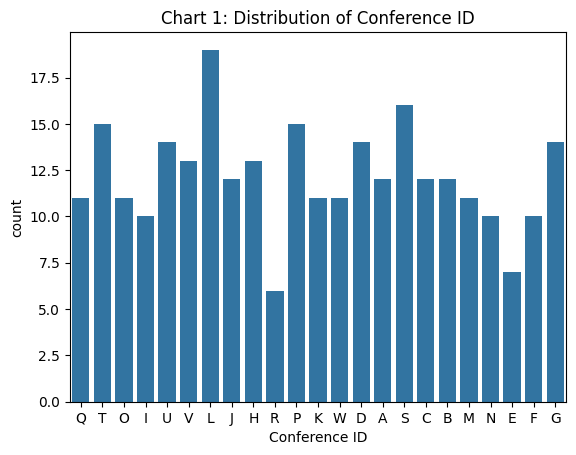

In [26]:
# Display count plot for Conference ID
sns.countplot(x=volleyball_df["Conference ID"])
plt.title("Chart 1: Distribution of Conference ID")
plt.show()

In [16]:
# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
# sns.pairplot(volleyball_df, hue='Conference')

# Showing all plots
# plt.show()

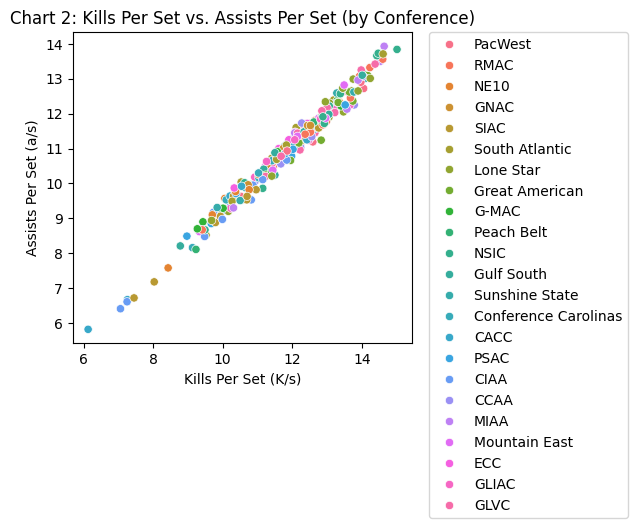

In [27]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=volleyball_df, x="Kills Per Set", y="Assists Per Set", hue="Conference")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Kills Per Set (K/s)")
scatter_plt.set_ylabel("Assists Per Set (a/s)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 2: Kills Per Set vs. Assists Per Set (by Conference)")

# Move legend outside to the right
scatter_plt.legend(
    bbox_to_anchor=(1.05, 1),   # position relative to axes
    loc='upper left',           # anchor point
    borderaxespad=0.
)

plt.tight_layout() # adjusts my graph so nothing is cut off
plt.show()

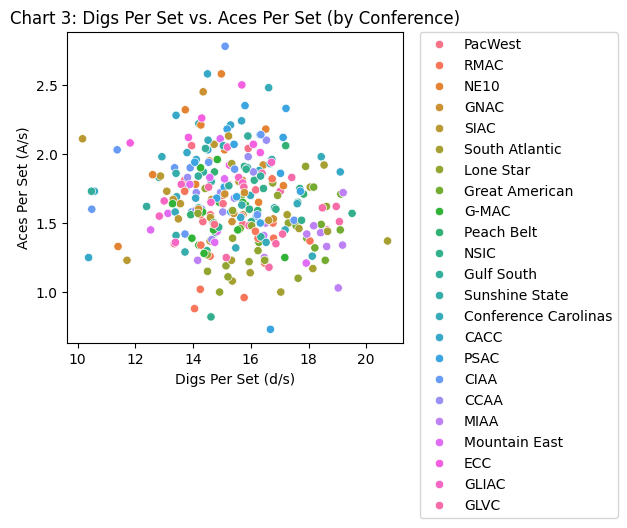

In [28]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=volleyball_df, x="Digs Per Set", y="Aces Per Set", hue="Conference")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Digs Per Set (d/s)")
scatter_plt.set_ylabel("Aces Per Set (A/s)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 3: Digs Per Set vs. Aces Per Set (by Conference)")

# Move legend outside to the right
scatter_plt.legend(
    bbox_to_anchor=(1.05, 1),   # position relative to axes
    loc='upper left',           # anchor point
    borderaxespad=0.
)

plt.tight_layout() # adjusts my graph so nothing is cut off
plt.show()

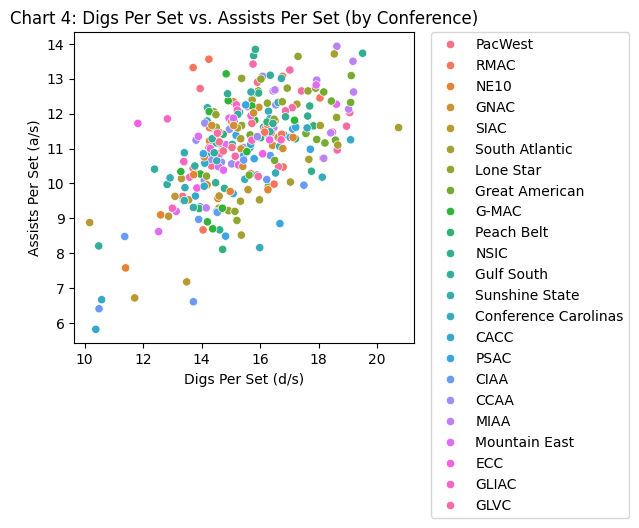

In [29]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=volleyball_df, x="Digs Per Set", y="Assists Per Set", hue="Conference")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Digs Per Set (d/s)")
scatter_plt.set_ylabel("Assists Per Set (a/s)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 4: Digs Per Set vs. Assists Per Set (by Conference)")

# Move legend outside to the right
scatter_plt.legend(
    bbox_to_anchor=(1.05, 1),   # position relative to axes
    loc='upper left',           # anchor point
    borderaxespad=0.
)

plt.tight_layout() # adjusts my graph so nothing is cut off
plt.show()

There is clear correlations in volleyball, and these are the keys to winning, but we can't have them all. It is also about balance. Let's take a look at the Great Lakes Valley Conference (GLVC) and how these teams come in relation with another.

### GLVC Dataframe

In [20]:
# Importing the CSV file into a DataFrame using Pandas
glvc_df = pd.read_csv('data/glvc_stats.csv')

glvc_df.info()
glvc_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_id             14 non-null     object 
 1   school_name           14 non-null     object 
 2   school_conference     14 non-null     object 
 3   conference_id         14 non-null     object 
 4   sets_played           14 non-null     int64  
 5   match_win             14 non-null     int64  
 6   match_loss            14 non-null     int64  
 7   ttl_ace               14 non-null     int64  
 8   ace_set               14 non-null     float64
 9   ttl_assist            14 non-null     int64  
 10  assist_set            14 non-null     float64
 11  ttl_soloblock         14 non-null     int64  
 12  ttl_blockassist       14 non-null     int64  
 13  block_set             14 non-null     float64
 14  ttl_dig               14 non-null     int64  
 15  dig_set               14 

,school_id,school_name,school_conference,conference_id,sets_played,match_win,match_loss,ttl_ace,ace_set,ttl_assist,...,ttl_atterror,ttl_attack,attack_percentage,attack_set,attkill_set,win_percentage,ttl_oppkill,ttl_oppatterror,ttl_oppattack,oppattack_percentage
0,t076,Drury,GLVC,G,106,14,13,154,1.45,1162,...,587,4008,0.177,37.81,12.22,0.518519,1321,585,4221,0.174
1,t117,Ill. Springfield,GLVC,G,105,18,10,195,1.86,1202,...,508,3904,0.210,37.18,12.65,0.642857,1366,560,3984,0.202
2,t133,Lewis,GLVC,G,129,23,11,195,1.51,1552,...,643,5138,0.207,39.83,13.22,0.676471,1653,756,5344,0.168
3,t144,Maryville (MO),GLVC,G,106,17,11,172,1.62,1234,...,519,4144,0.196,39.09,12.56,0.607143,1310,571,4201,0.176
4,t145,McKendree,GLVC,G,101,11,16,163,1.61,1158,...,544,3880,0.174,38.42,12.08,0.407407,1276,528,3957,0.189


In [21]:
# Importing the CSV file into a DataFrame using Pandas
glvc_df.describe()

,sets_played,match_win,match_loss,ttl_ace,ace_set,ttl_assist,assist_set,ttl_soloblock,ttl_blockassist,block_set,...,ttl_atterror,ttl_attack,attack_percentage,attack_set,attkill_set,win_percentage,ttl_oppkill,ttl_oppatterror,ttl_oppattack,oppattack_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,109.571429,15.214286,13.571429,170.857143,1.557857,1286.714286,11.715714,53.714286,324.857143,1.960714,...,575.500000,4149.785714,0.194929,37.833571,12.635714,0.522923,1375.785714,583.928571,4163.142857,0.191643
std,8.437228,6.002289,5.018647,27.250567,0.215377,172.260281,0.962894,15.750109,75.236915,0.264269,...,52.501648,404.355171,0.026560,1.259735,0.930531,0.186592,108.598186,73.578283,440.043504,0.023114
min,100.000000,6.000000,6.000000,118.000000,1.180000,1048.000000,10.200000,26.000000,210.000000,1.550000,...,508.000000,3637.000000,0.163000,35.310000,11.230000,0.214286,1264.000000,471.000000,3507.000000,0.155000
25%,103.500000,10.250000,10.250000,156.250000,1.427500,1164.750000,11.080000,46.750000,276.000000,1.792500,...,546.750000,3886.000000,0.174750,37.052500,12.097500,0.379630,1295.750000,531.000000,3960.250000,0.176500
50%,106.000000,15.500000,12.000000,171.000000,1.560000,1218.000000,11.555000,50.000000,319.000000,1.905000,...,579.500000,4100.500000,0.193000,38.010000,12.605000,0.562831,1360.000000,574.000000,4148.500000,0.189500
75%,114.500000,19.000000,16.750000,192.000000,1.752500,1423.500000,12.147500,61.000000,348.750000,2.145000,...,587.000000,4302.500000,0.209250,38.487500,13.165000,0.668067,1412.250000,628.250000,4299.000000,0.201250
max,129.000000,25.000000,22.000000,208.000000,1.860000,1583.000000,13.420000,87.000000,505.000000,2.530000,...,703.000000,5138.000000,0.251000,39.830000,14.380000,0.806452,1653.000000,756.000000,5344.000000,0.250000


### Feature Engineering 2

In [22]:
# Feature Engineering
# Renaming Columns
glvc_df.rename(columns={
    'school_id': 'School ID',
    'school_name': 'School Name',
    'school_conference': 'Conference',
    'conference_id': 'Conference ID',
    'sets_played': 'total Sets',
    'match_win': 'Wins',
    'match_loss': 'Losses',
    'ttl_ace': 'Total Aces',
    'ace_set': 'Aces Per Set',
    'ttl_assist': 'Total Assists',
    'assist_set': 'Assists Per Set',
    'ttl_soloblock': 'Total Solo Blocks',
    'ttl_blockassist': 'Total Block Assists',
    'block_set': 'Blocks Per Set',
    'ttl_dig': 'Total Digs',
    'dig_set': 'Digs Per Set',
    'ttl_attkill': 'Total Kills',
    'ttl_atterror': 'Total Attacking Errors',
    'ttl_attack': 'Total Attacks',
    'attack_percentage': 'Hitting Percentage',
    'attack_set': 'Total Attacks Per Set',
    'attkill_set': 'Kills Per Set',
    'win_percentage': 'Winning Percentage',
    'ttl_oppkill': 'Total Kills by Opponent',
    'ttl_oppatterror': 'Total Hitting Errors by Opponent',
    'oppattack_percentage': 'Opponent Hitting Percentage',
    'ttl_oppattack': 'Total Attacks by Opponent'
     },
       inplace=True)

In [23]:
# Feature Engineering
# Dropping Columns
glvc_df.drop(columns=[
    'School ID', 
    'Wins',
    'Losses',
    'total Sets', 
    'Total Aces', 
    'Total Assists', 
    'Total Solo Blocks', 
    'Total Block Assists', 
    'Total Digs', 
    'Total Kills', 
    'Total Attacking Errors', 
    'Total Attacks', 
    'Total Kills by Opponent', 
    'Total Hitting Errors by Opponent', 
    'Total Attacks by Opponent'
    ], 
    inplace=True
    )

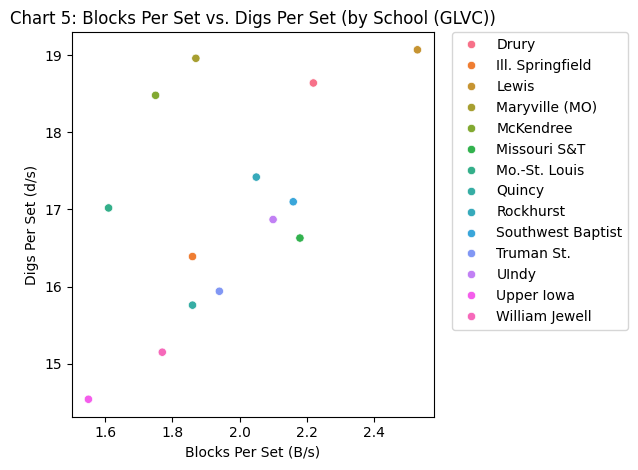

In [30]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=glvc_df, x="Blocks Per Set", y="Digs Per Set", hue="School Name")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Blocks Per Set (B/s)")
scatter_plt.set_ylabel("Digs Per Set (d/s)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 5: Blocks Per Set vs. Digs Per Set (by School (GLVC))")

# Move legend outside to the right
scatter_plt.legend(
    bbox_to_anchor=(1.05, 1),   # position relative to axes
    loc='upper left',           # anchor point
    borderaxespad=0.
)

plt.tight_layout() # adjusts my graph so nothing is cut off
plt.show()

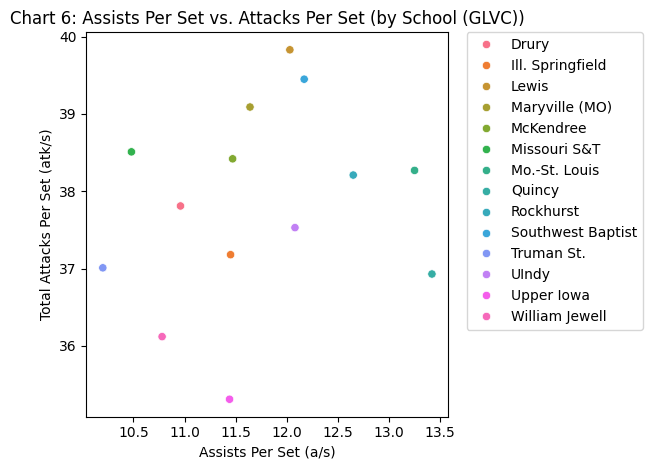

In [31]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=glvc_df, x="Assists Per Set", y="Total Attacks Per Set", hue="School Name")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Assists Per Set (a/s)")
scatter_plt.set_ylabel("Total Attacks Per Set (atk/s)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 6: Assists Per Set vs. Attacks Per Set (by School (GLVC))")

# Move legend outside to the right
scatter_plt.legend(
    bbox_to_anchor=(1.05, 1),   # position relative to axes
    loc='upper left',           # anchor point
    borderaxespad=0.
)

plt.tight_layout() # adjusts my graph so nothing is cut off
plt.show()

In [32]:
# Feature Engineering
# Adding a New Column
glvc_df['Defense Per Set'] = (glvc_df['Digs Per Set'] + glvc_df['Blocks Per Set'])
glvc_df['Offense Per Set'] = (glvc_df['Kills Per Set'] + glvc_df['Aces Per Set'])

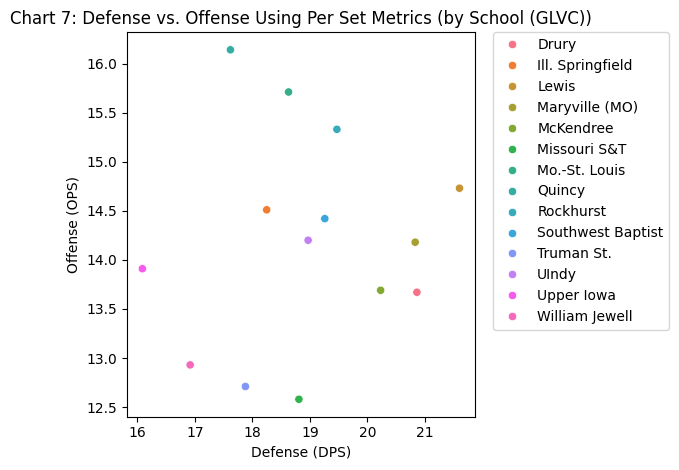

In [33]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=glvc_df, x="Defense Per Set", y="Offense Per Set", hue="School Name")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Defense (DPS)")
scatter_plt.set_ylabel("Offense (OPS)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 7: Defense vs. Offense Using Per Set Metrics (by School (GLVC))")

# Move legend outside to the right
scatter_plt.legend(
    bbox_to_anchor=(1.05, 1),   # position relative to axes
    loc='upper left',           # anchor point
    borderaxespad=0.
)

plt.tight_layout() # adjusts my graph so nothing is cut off
plt.show()

### Insights

### Final Annotations